In [1372]:
import numpy as np
import math
import sympy as sp
import matplotlib.pyplot as plt

def diff(f, var = 'x y', d = 'y'):
    d = sp.symbols(d)
    x, y = sp.symbols(var)
    
    f_sym = f(x, y)
    
    df = sp.diff(f_sym, d)
    
    df = sp.lambdify((x, y), df)
    return df

dy = lambda t, y: y - t**2 + 1  

a, b = 0, 2
y0 = 0.5
h = 0.2


**Método de Euler**

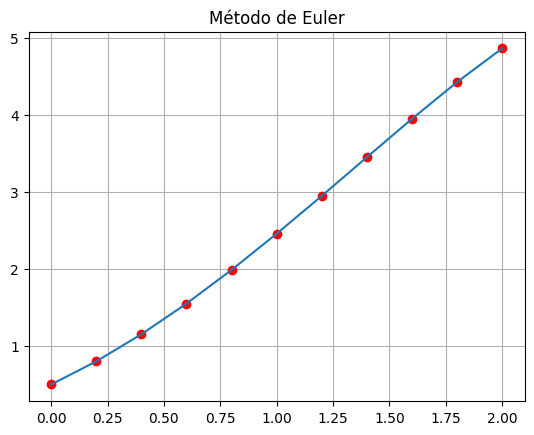

In [1373]:
def euler(f, a, b, y0, n = 10):
    h = (b - a) / n
    
    t = np.zeros(n+1)
    w = np.zeros(n+1)

    t[0] = a
    w[0] = y0
    
    for i in range(1, n+1):
        w[i] = w[i-1] + h * f(t[i-1], w[i-1])
        t[i] = t[i-1] + h
    return t, w

t, w = euler(dy, a, b, y0)

plt.title(f"Método de Euler")
plt.plot(t,w, 'ro')
plt.plot(t,w)
plt.grid()
plt.show()

**Método de Taylor de Ordem Superior**

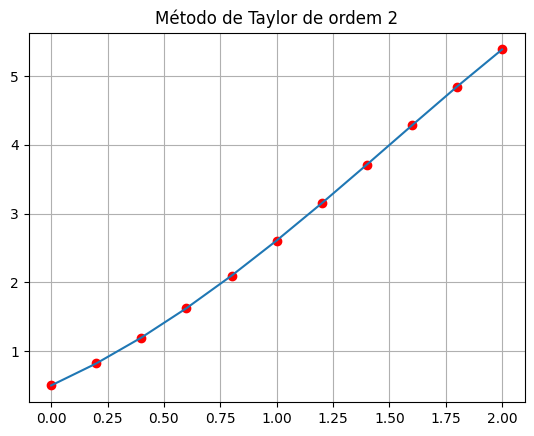

In [1374]:
def taylor(d, a, b, y0, n = 10):
    h = (b - a) / n
    t = np.arange(a, b+h, h)
    w = [y0]
    
    order = len(d) + 1
    for j in range(len(t) - 1):
        taylor_sum = w[j]
        for i in range(1,order):
            taylor_sum += (d[i-1](t[j], w[j]) * h**i / math.factorial(i))
        w.append(taylor_sum)
    return t, w

d = [dy,  diff(dy, var = 't y')]
t, w = taylor(d, a, b, y0)

plt.title("Método de Taylor de ordem 2")
plt.plot(t,w, 'ro')
plt.plot(t,w)
plt.grid()
plt.show()

**Método de Runge-Kutta**

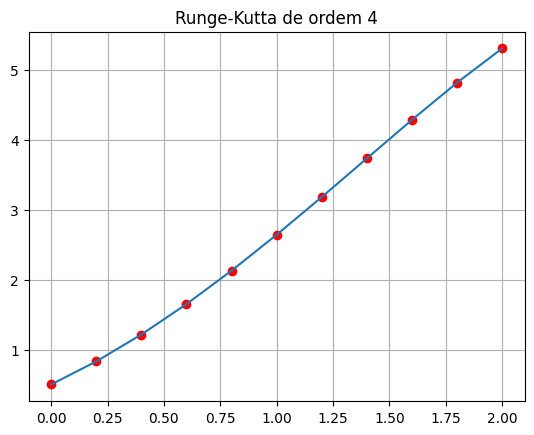

In [1375]:
def runge_kutta(f, a, b, y0, n = 10):
    h = (b - a) / n 

    t = np.zeros(n+1)
    w = np.zeros(n+1)

    t[0] = a
    w[0] = y0
    
    for i in range(1,n+1):
        K1 = h * f(t[i-1], w[i-1])
        K2 = h * f(t[i-1] + h / 2, w[i-1] + K1 / 2)
        K3 = h * f(t[i-1] + h / 2, w[i-1] + K2 / 2)
        K4 = h * f(t[i-1] + h, w[i-1] + K3)
        
        w[i] = w[i-1] + (K1 + 2 * K2 + 2 * K3 + K4) / 6
        t[i] = t[i-1] + h
    
    return t, w

t, w = runge_kutta(dy, a, b, y0)

plt.title("Runge-Kutta de ordem 4")
plt.plot(t,w, 'ro')
plt.plot(t,w)
plt.grid()
plt.show()


**Método de Runge-Kutta-Fehlberg**

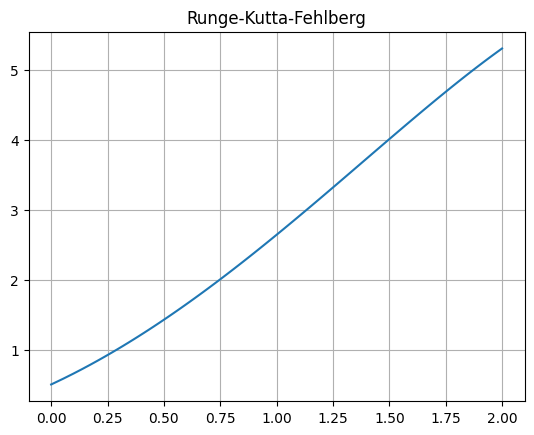

In [1376]:
def runge_kutta_fehlberg(f, a, b, y0, e = 1e-5, n = 10):
    h = (b-a) / n

    ts = [a]
    ws = [y0]

    t = a
    w = y0
    
    while t < b:
        if t + h > b:
            h = b - t
        
        K1 = h * f(t, w)
        K2 = h * f(t + (1/4) * h, w + (1/4) * K1)
        K3 = h * f(t + (3/8) * h, w + (3/32) * K1 + (9/32) * K2)
        K4 = h * f(t + (12/13) * h, w + (1932/2197) * K1 - (7209/2197) * K2 + (7296/2197) * K3)
        K5 = h * f(t + h, w + (439/216) * K1 - 8 * K2 + (3680/513) * K3 - (845/4104) * K4)
        K6 = h * f(t + (1/2) * h, w - (8/27) * K1 + 2 * K2 - (3544/2565) * K3 + (1859/4104) * K4 - (11/40) * K5)
        
        R = abs( (1/360) * K1 - (128/4275) * K3 - (2197/75240) * K4 + (1/50) * K5 + (2/55) * K6 ) / h
        
        if R <= e:
            t = t + h
            w = w + 25/216 * K1 + 1408/2565 * K3 + 2197/4104 * K4 - 1/5 * K5
            ts.append(t)
            ws.append(w)
        
        delta = 0.84 * (e / R)**(1/4)
        h = h * min(max(delta, 0.1), 4.0)
    
    return ts, ws

t, w = runge_kutta_fehlberg(dy, a, b, y0)

plt.title("Runge-Kutta-Fehlberg")
#plt.plot(t,w, 'ro')
plt.plot(t,w)
plt.grid()
plt.show()



In [1377]:
def runge_kutta4(f, a, y0, h):
    K1 = h * f(a, y0)
    K2 = h * f(a + h/2, y0 + K1/2)
    K3 = h * f(a + h/2, y0 + K2/2)
    K4 = h * f(a + h, y0 + K3)
    
    return y0 + (K1 + 2*K2 + 2*K3 + K4) / 6.0

**Método Explícito de Adams-Bashfort**

In [1378]:
def predictor(f, t, w, h, i):
    fn = f(t[i], w[i])
    fn1 = f(t[i-1], w[i-1])
    fn2 = f(t[i-2], w[i-2])
    fn3 = f(t[i-3], w[i-3])

    return w[i] + (h / 24) * (55*fn - 59*fn1 + 37*fn2 - 9*fn3)


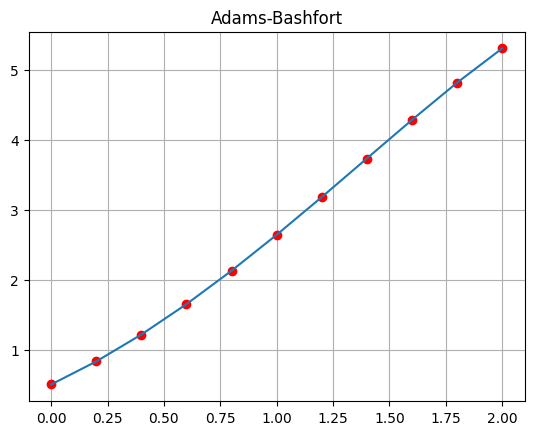

In [1379]:
def adams_bashfort(f, a, b, y0, h):
    n = int((b - a) / h)
    
    t = np.zeros(n + 1)
    w = np.zeros(n + 1)

    t[0] = a
    w[0] = y0

    for i in range(3):
        w[i+1] = runge_kutta4(f, t[i], w[i], h)
        t[i+1] = t[i] + h

    for i in range(3, n):
        t[i+1] = t[i] + h
        w[i+1] = predictor(f, t, w, h, i)
    
    return t, w

t, w = adams_bashfort(dy, a, b, y0, h)

plt.title("Adams-Bashfort")
plt.plot(t,w, 'ro')
plt.plot(t,w)
plt.grid()
plt.show()


**Método Implícito de Adams-Moulton**

In [1380]:
def corrector(f, t, w, h, i):
    w_predict = predictor(f, t, w, h, i)

    fn = f(t[i+1], w_predict)
    fn1 = f(t[i], w[i])
    fn2 = f(t[i-1], w[i-1])
    fn3 = f(t[i-2], w[i-2])
    
    return w[i] + (h / 24) * (9*fn + 19*fn1 - 5*fn2 + fn3)


**Método Preditor-Corretor de Adams**

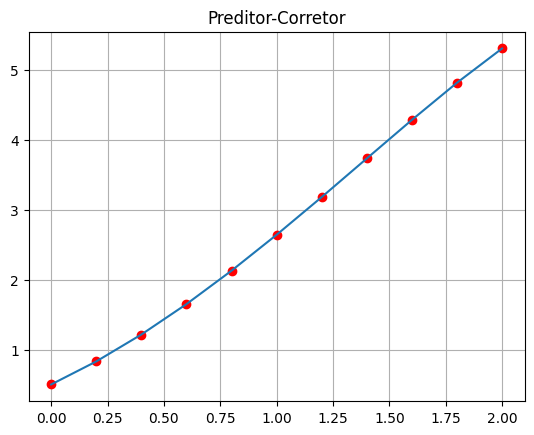

In [1381]:
def predictor_corrector(f, a, b, y0, h):

    n = int((b - a) / h)
    
    t = np.zeros(n + 1)
    w = np.zeros(n + 1)

    t[0] = a
    w[0] = y0

    for i in range(3):
        w[i+1] = runge_kutta4(f, t[i], w[i], h)
        t[i+1] = t[i] + h

    for i in range(3, n):
        t[i+1] = t[i] + h
        w[i+1] = corrector(f, t, w, h, i)

    return t, w

t, w = predictor_corrector(dy, a, b, y0, h)

plt.title("Preditor-Corretor")
plt.plot(t,w, 'ro')
plt.plot(t,w)
plt.grid()
plt.show()

**Preditor-Corretor passo Váriavel**

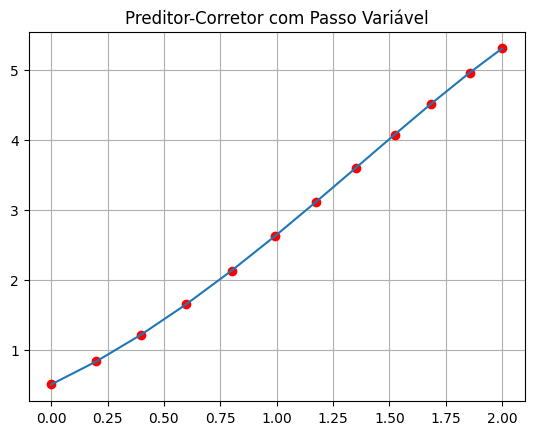

In [1382]:
def h_predictor_corrector(f, a, b, y0, h0, e = 1e-5):
    t = [a]
    w = [y0]
    h = [h0]
    
    for i in range(3):
        hi = h[-1]
        t_next = t[-1] + hi
        w_next = runge_kutta4(f, t[-1], w[-1], h[-1])
        
        t.append(t_next)
        w.append(w_next)
        h.append(hi)  

    while t[-1] < b:
        i = len(t) - 1
        hi = h[-1]
        wp = predictor(f, t, w, h[-1], i)

        t_next = t[-1] + hi
        t.append(t_next)
        
        
        wc = corrector(f, t, w, h[-1], i)
        
        if abs(wc - wp) > e: 
            hi = 0.96 * hi
        else:
            hi = 1.04 * hi

        if t_next + hi > b:
            hi = b - t_next
        
        w.append(wc)
        h.append(hi)

    return t, w, h

t, w, h = h_predictor_corrector(dy, a, b, y0, h)

plt.title("Preditor-Corretor com Passo Variável")
plt.plot(t,w, 'ro')
plt.plot(t,w)
plt.grid()
plt.show()
